In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df = pd.read_csv('HC_raq_grid.csv')
print(df)

          time  HC_raq_grid
0            0        0.001
1            1        0.001
2            2        0.001
3            3        0.001
4            4        0.001
...        ...          ...
131035  131035       31.001
131036  131036       10.002
131037  131037       10.002
131038  131038       10.002
131039  131039        0.003

[131040 rows x 2 columns]


In [12]:
#preparing to calculate averages
df['time'] = pd.date_range('2023-01-01 00:00:00', '2023-04-01 23:59:00', freq='1T')  # '1T' stands for 1 minutes
df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time
new_df = df[['date','time','HC_raq_grid']]

print(new_df)



              date      time  HC_raq_grid
0       2023-01-01  00:00:00        0.001
1       2023-01-01  00:01:00        0.001
2       2023-01-01  00:02:00        0.001
3       2023-01-01  00:03:00        0.001
4       2023-01-01  00:04:00        0.001
...            ...       ...          ...
131035  2023-04-01  23:55:00       31.001
131036  2023-04-01  23:56:00       10.002
131037  2023-04-01  23:57:00       10.002
131038  2023-04-01  23:58:00       10.002
131039  2023-04-01  23:59:00        0.003

[131040 rows x 3 columns]


In [13]:
#Calculating the average

average= new_df.groupby(['date', 'time'])['HC_raq_grid'].mean().reset_index()
average_pivot = average.pivot(index='date', columns='time', values='HC_raq_grid')
average_daily = average_pivot.mean(axis=0)
average_daily= average_daily.to_frame()
average_daily.reset_index(inplace=True)
average_daily.rename(columns={0: 'HC_raq_grid'}, inplace=True)
#average_daily_1 = average_daily_1[['time','P']]
#output_csv_path = 'avg_profile.csv'
#avg_profile.to_csv(output_csv_path, index=True)

average_daily.to_csv('HC_raq_grid_avg.csv', index=False)
print(average_daily)

          time  HC_raq_grid
0     00:00:00     9.012374
1     00:01:00    20.221066
2     00:02:00    20.221077
3     00:03:00    22.528736
4     00:04:00    27.199000
...        ...          ...
1435  23:55:00    51.782352
1436  23:56:00    38.650626
1437  23:57:00    25.156385
1438  23:58:00    19.365275
1439  23:59:00    10.178703

[1440 rows x 2 columns]


/tmp/ipykernel_23807/3720004531.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['time'] = pd.to_datetime(df1['time'])
/tmp/ipykernel_23807/3720004531.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['time'] = pd.to_datetime(df2['time'])
/tmp/ipykernel_23807/3720004531.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['time'] = pd.to_datetime(df3['time'])
/tmp/ipykernel_23807/3720004531.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, plea

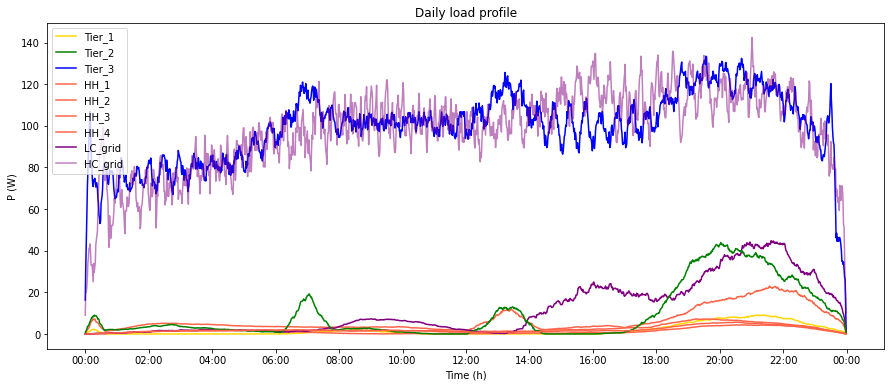

In [9]:
df1 = pd.read_csv('tiers.csv')
df1['time'] = pd.to_datetime(df1['time'])

df2 = pd.read_csv('HH_raq.csv')
df2['time'] = pd.to_datetime(df2['time'])

df3 = pd.read_csv('LC_raq_grid_avg.csv')
df3['time'] = pd.to_datetime(df3['time'])

df4 = pd.read_csv('HC_raq_grid_avg.csv')
df4['time'] = pd.to_datetime(df4['time'])

#df_month = pd.read_csv('celestina_mod.py')

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df1['time'], df1['1'], label='Tier_1', color = 'gold', zorder=1)
ax.plot(df1['time'], df1['2'], label='Tier_2', color = 'green', zorder=2)
ax.plot(df1['time'], df1['3'], label='Tier_3', color = 'blue', zorder=1)
#ax.plot(df1['time'], df1['4'], label='Tier_4', color = 'orange', zorder=1)

ax.plot(df2['time'], df2['HH_1'], label='HH_1', color = 'tomato', zorder=1)
ax.plot(df2['time'], df2['HH_2'], label='HH_2', color = 'tomato', zorder=2)
ax.plot(df2['time'], df2['HH_3'], label='HH_3', color = 'tomato', zorder=1)
ax.plot(df2['time'], df2['HH_4'], label='HH_4', color = 'tomato', zorder=1)

ax.plot(df3['time'], df3['LC_raq_grid'], label='LC_grid', color = 'purple', zorder=1)
ax.plot(df4['time'], df4['HC_raq_grid'], label='HC_grid', color = 'purple', zorder=2, alpha=.5)


ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Adjust interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# Customize the plot
plt.title('Daily load profile')
plt.xlabel('Time (h)')
plt.ylabel('P (W)')
plt.legend()


plt.show()